Task1
MNIST dataset 

In [ ]:
# download the dataset
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

print(train_images.shape,test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
# data preprocess
# transform the data type and labels
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# construct the network model
from keras import models,layers
# model1
model = models.Sequential()
# The first later needs to point out input shape
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

 

In [ ]:
model2 = model # model2
model3 = model # model3
model4 = model # model4
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
# Check parameters. There are about 121 thousands parameters.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
# compile
model.compile(optimizer = 'sgd',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])

model2.compile(optimizer = 'adam',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])

model3.compile(optimizer = 'rmsprop',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])

model4.compile(optimizer = 'nadam',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])

In [ ]:
# train the model
hist = model.fit(train_images, train_labels, epochs=10, batch_size=128)
print('-----------------------------------------------------------------------------')
hist2 = model2.fit(train_images, train_labels, epochs=10, batch_size=128)
print('-----------------------------------------------------------------------------')
hist3 = model3.fit(train_images, train_labels, epochs=10, batch_size=128)
print('-----------------------------------------------------------------------------')
hist4 = model4.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 36s 73ms/step - loss: 0.4715 - accuracy: 0.8536
Epoch 2/10
469/469 [==============================] - 34s 73ms/step - loss: 0.1906 - accuracy: 0.9434
Epoch 3/10
469/469 [==============================] - 33s 71ms/step - loss: 0.1471 - accuracy: 0.9568
Epoch 4/10
469/469 [==============================] - 34s 73ms/step - loss: 0.1238 - accuracy: 0.9633
Epoch 5/10
469/469 [==============================] - 33s 69ms/step - loss: 0.1048 - accuracy: 0.9688
Epoch 6/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0918 - accuracy: 0.9723
Epoch 7/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0831 - accuracy: 0.9752
Epoch 8/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0772 - accuracy: 0.9758
Epoch 9/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0714 - accuracy: 0.9790
Epoch 10/10
469/469 [==============================] - 32s 69ms/step - loss: 0.067

In [ ]:
# test 
test_loss,test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

test_loss2,test_acc2 = model2.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

test_loss3,test_acc3 = model3.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

test_loss4,test_acc4 = model4.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0300 - accuracy: 0.9932
0.03000229224562645
0.9932000041007996
313/313 [==============================] - 2s 6ms/step - loss: 0.0300 - accuracy: 0.9932
0.03000229224562645
0.9932000041007996
313/313 [==============================] - 2s 7ms/step - loss: 0.0300 - accuracy: 0.9932
0.03000229224562645
0.9932000041007996
313/313 [==============================] - 2s 6ms/step - loss: 0.0300 - accuracy: 0.9932
0.03000229224562645
0.9932000041007996


<Figure size 432x288 with 0 Axes>

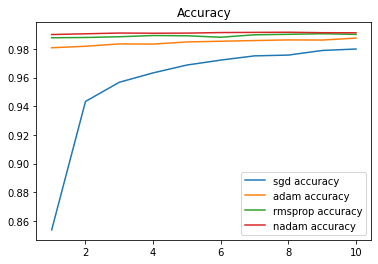

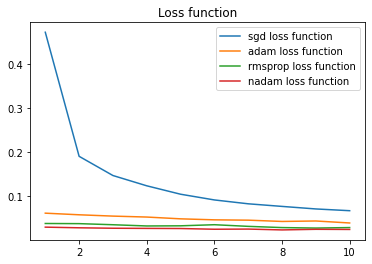

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualization
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
loss = hist.history['loss']
epochs = range(1, len(acc)+1)

acc2 = hist2.history['accuracy']
loss2 = hist2.history['loss']
epochs2 = range(1, len(acc2)+1)

acc3 = hist3.history['accuracy']
loss3 = hist3.history['loss']
epochs3 = range(1, len(acc3)+1)

acc4 = hist4.history['accuracy']
loss4 = hist4.history['loss']
epochs4 = range(1, len(acc4)+1)
plt.plot(epochs, acc, label='sgd accuracy')
plt.plot(epochs2, acc2, label='adam accuracy')
plt.plot(epochs3, acc3, label='rmsprop accuracy')
plt.plot(epochs4, acc4, label='nadam accuracy')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='sgd loss function')
plt.plot(epochs2, loss2, label='adam loss function')
plt.plot(epochs3, loss3, label='rmsprop loss function')
plt.plot(epochs4, loss4, label='nadam loss function')
plt.title('Loss function')
plt.legend()
plt.figure()

In these two graphs, the lines of different colors represent different optimizers. We can see that the accuracy of the Nadam optimizer is the highest and more stable, and the accuracy of the SGD optimizer is gradually increased, but it is not as good as the other three. And in the end, their accuracy is all greater than 96%. 
In addition, similarly, the loss function of SGD optimizer declines gradually and eventually becomes stable. The Adam and RMSprop optimizers’ are always stable around 0.04, while the Nadam optimizr is the one with the lowest loss function value, around 0.03.

Task2
CIFAR10 dataset

In [ ]:
# download and import
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test)=cifar10.load_data()
print('data format:',X_train.shape)
print('the number of dataset:',X_train.shape[0], X_test.shape[0])

170498071/170498071 [==============================] - 5s 0us/step
data format: (50000, 32, 32, 3)
the number of dataset: 50000 10000


In [ ]:
# data preprocess
from tensorflow.keras.utils import to_categorical
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# construct the model
from keras import models,layers
# new model1
new_model = models.Sequential()
# The first later needs to point out input shape
new_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Dropout(0.25))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(64, activation='relu'))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(10, activation='softmax'))

model5 = new_model # new model2
model6 = new_model # new model3
model7 = new_model # new model4

In [ ]:
# check parameters
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)             

In [ ]:
# compile
new_model.compile(optimizer = 'sgd',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])
model5.compile(optimizer = 'adam',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])
model6.compile(optimizer = 'rmsprop',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])
model7.compile(optimizer = 'nadam',
       loss = 'categorical_crossentropy',
       metrics = ['accuracy'])

In [ ]:
# Train. 'shuffle = True' means randomly shuffling the data of each epoch.
new_hist = new_model.fit(X_train, y_train, epochs=10, batch_size=128, shuffle=True)
print('-----------------------------------------------------------------------------')
hist5 = model5.fit(X_train, y_train, epochs=10, batch_size=128, shuffle=True)
print('-----------------------------------------------------------------------------')
hist6 = model6.fit(X_train, y_train, epochs=10, batch_size=128, shuffle=True)
print('-----------------------------------------------------------------------------')
hist7 = model7.fit(X_train, y_train, epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
391/391 [==============================] - 41s 104ms/step - loss: 1.5685 - accuracy: 0.4208
Epoch 2/10
391/391 [==============================] - 41s 106ms/step - loss: 1.4700 - accuracy: 0.4620
Epoch 3/10
391/391 [==============================] - 40s 103ms/step - loss: 1.3982 - accuracy: 0.4904
Epoch 4/10
391/391 [==============================] - 41s 104ms/step - loss: 1.3418 - accuracy: 0.5112
Epoch 5/10
391/391 [==============================] - 40s 103ms/step - loss: 1.3025 - accuracy: 0.5258
Epoch 6/10
391/391 [==============================] - 40s 103ms/step - loss: 1.2639 - accuracy: 0.5424
Epoch 7/10
391/391 [==============================] - 41s 105ms/step - loss: 1.2280 - accuracy: 0.5592
Epoch 8/10
391/391 [==============================] - 40s 103ms/step - loss: 1.1975 - accuracy: 0.5702
Epoch 9/10
391/391 [==============================] - 41s 104ms/step - loss: 1.1707 - accuracy: 0.5811
Epoch 10/10
391/391 [==============================] - 41s 104ms/step - l

In [ ]:
# evaluate
new_test_loss,new_test_acc = new_model.evaluate(X_test, y_test)
print(new_test_loss)
print(new_test_acc)

test_loss5,test_acc5 = model5.evaluate(X_test, y_test)
print(test_loss5)
print(test_acc5)

test_loss6,test_acc6 = model6.evaluate(X_test, y_test)
print(test_loss6)
print(test_acc6)

test_loss7,test_acc7 = model7.evaluate(X_test, y_test)
print(test_loss7)
print(test_acc7)

313/313 [==============================] - 3s 8ms/step - loss: 0.8410 - accuracy: 0.7130
0.8409765362739563
0.7129999995231628
313/313 [==============================] - 3s 8ms/step - loss: 0.8410 - accuracy: 0.7130
0.8409765362739563
0.7129999995231628
313/313 [==============================] - 4s 12ms/step - loss: 0.8410 - accuracy: 0.7130
0.8409765362739563
0.7129999995231628
313/313 [==============================] - 3s 8ms/step - loss: 0.8410 - accuracy: 0.7130
0.8409765362739563
0.7129999995231628


<Figure size 432x288 with 0 Axes>

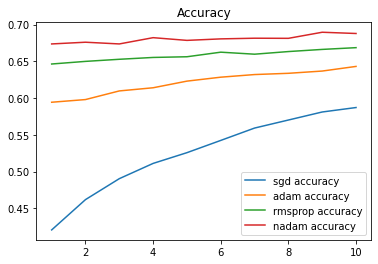

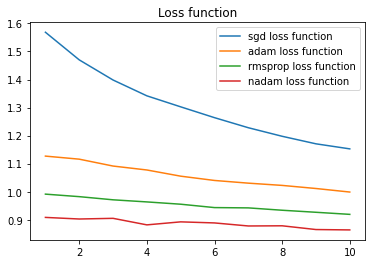

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualization.
import matplotlib.pyplot as plt
new_acc = new_hist.history['accuracy']
new_loss = new_hist.history['loss']
new_epochs = range(1, len(new_acc)+1)

acc5 = hist5.history['accuracy']
loss5 = hist5.history['loss']
epochs5 = range(1, len(acc5)+1)

acc6 = hist6.history['accuracy']
loss6 = hist6.history['loss']
epochs6 = range(1, len(acc6)+1)

acc7 = hist7.history['accuracy']
loss7 = hist7.history['loss']
epochs7 = range(1, len(acc7)+1)

plt.plot(new_epochs, new_acc, label='sgd accuracy')
plt.plot(epochs5, acc5, label='adam accuracy')
plt.plot(epochs6, acc6, label='rmsprop accuracy')
plt.plot(epochs7, acc7, label='nadam accuracy')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(new_epochs, new_loss, label='sgd loss function')
plt.plot(epochs5, loss5, label='adam loss function')
plt.plot(epochs6, loss6, label='rmsprop loss function')
plt.plot(epochs7, loss7, label='nadam loss function')
plt.title('Loss function')
plt.legend()
plt.figure()

In these two graphs, we can see that, similar to the results of the previous task, the SGD optimizer has a stable increase in accuracy, and the Nadam optimizer has the highest accuracy, but their accuracy is not as high as that of the previous task, with the highest accuracy less than 70% and the lowest just over 55%.
Moreover, when processing the CIFAR10 dataset , among the four optimizers, the SGD optimizer has the highest loss function, which reaches about 1.2, and the nadam has the lowest loss function, which is still about 0.9. The overall situation is not as good as the performance of the previous task.